# Bitcoin Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
## Read the dataset
df = pd.read_csv('./bitcoin.csv')
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [3]:
df.shape

(367, 2)

In [4]:
df.size

734

In [5]:
## Remove date column
df.drop(['Date'],1,inplace=True)

In [6]:
df.head()

,Price
0,7881.846680
1,7987.371582
2,8052.543945
3,8673.215820
4,8805.778320


In [7]:
prediction_days = 30
# Create another column
df['Prediction'] = df[['Price']].shift(-prediction_days)

In [8]:
df.head()

,Price,Prediction
0,7881.846680,10701.69141
1,7987.371582,10855.37109
2,8052.543945,11011.10254
3,8673.215820,11790.91699
4,8805.778320,13016.23145


In [9]:
df.tail()

,Price,Prediction
362,9729.038086,NaN
363,9522.981445,NaN
364,9081.761719,NaN
365,9182.577148,NaN
366,9180.045898,NaN


In [10]:
# Create the independent data set
# Here we will convert the dataframe into a numpy array and drop the column prediction
x = np.array(df.drop(['Prediction'],1))
# Remove the last 'n' rows where 'n' is the predictiondays
x = x[:len(df)-prediction_days]
print(x)

[[ 7881.84668 ]
 [ 7987.371582]
 [ 8052.543945]
 [ 8673.21582 ]
 [ 8805.77832 ]
 [ 8719.961914]
 [ 8659.487305]
 [ 8319.472656]
 [ 8574.501953]
 [ 8564.016602]
 [ 8742.958008]
 [ 8208.995117]
 [ 7707.770996]
 [ 7824.231445]
 [ 7822.023438]
 [ 8043.951172]
 [ 7954.12793 ]
 [ 7688.077148]
 [ 8000.32959 ]
 [ 7927.714355]
 [ 8145.857422]
 [ 8230.923828]
 [ 8693.833008]
 [ 8838.375   ]
 [ 8994.488281]
 [ 9320.352539]
 [ 9081.762695]
 [ 9273.521484]
 [ 9527.160156]
 [10144.55664 ]
 [10701.69141 ]
 [10855.37109 ]
 [11011.10254 ]
 [11790.91699 ]
 [13016.23145 ]
 [11182.80664 ]
 [12407.33203 ]
 [11959.37109 ]
 [10817.15527 ]
 [10583.13477 ]
 [10801.67773 ]
 [11961.26953 ]
 [11215.4375  ]
 [10978.45996 ]
 [11208.55078 ]
 [11450.84668 ]
 [12285.95801 ]
 [12573.8125  ]
 [12156.5127  ]
 [11358.66211 ]
 [11815.98633 ]
 [11392.37891 ]
 [10256.05859 ]
 [10895.08984 ]
 [ 9477.641602]
 [ 9693.802734]
 [10666.48242 ]
 [10530.73242 ]
 [10767.13965 ]
 [10599.10547 ]
 [10343.10645 ]
 [ 9900.767578]
 [ 9811.

In [11]:
# Create the dependent data set
# Convert the dataframe into a numpy array
y = np.array(df['Prediction'])
# Get all the values except last 'n' rows
y = y[:-prediction_days]
print(y)

[10701.69141  10855.37109  11011.10254  11790.91699  13016.23145
 11182.80664  12407.33203  11959.37109  10817.15527  10583.13477
 10801.67773  11961.26953  11215.4375   10978.45996  11208.55078
 11450.84668  12285.95801  12573.8125   12156.5127   11358.66211
 11815.98633  11392.37891  10256.05859  10895.08984   9477.641602
  9693.802734 10666.48242  10530.73242  10767.13965  10599.10547
 10343.10645   9900.767578  9811.925781  9911.841797  9870.303711
  9477.677734  9552.860352  9519.145508  9607.423828 10085.62793
 10399.66895  10518.17481  10821.72656  10970.18457  11805.65332
 11478.16895  11941.96875  11966.40723  11862.93652  11354.02441
 11523.5791   11382.61621  10895.83008  10051.7041   10311.5459
 10374.33887  10231.74414  10345.81055  10916.05371  10763.23242
 10138.04981  10131.05566  10407.96484  10159.96094  10138.51758
 10370.82031  10185.5       9754.422852  9510.200195  9598.173828
  9630.664063  9757.970703 10346.76074  10623.54004  10594.49316
 10575.5332   10353.302

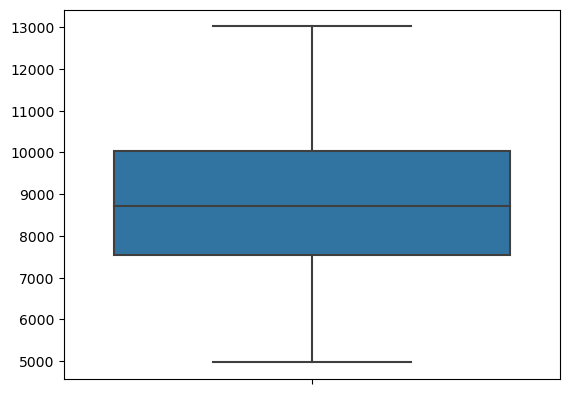

In [12]:
sns.boxplot(data=df,y=x)
plt.show()

In [13]:
df.isnull().mean()*100

Price         0.000000
Prediction    8.174387
dtype: float64

In [14]:
df.dropna(inplace=True)

In [15]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [16]:
# Model building
models = {"LinearRegression":LinearRegression(),
          "Ridge":Ridge(),
          "Lasso":Lasso(),
          "RandomForestRegressor":RandomForestRegressor(),
          "AdaBoostRegressor":AdaBoostRegressor(),
          "GradientBoostingRegressor":GradientBoostingRegressor(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "LinearSVR":LinearSVR()
    
}

In [17]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("Cross validation model:{}".format(name))
    rmse = np.sqrt(-scores)
    rmse_avg = np.mean(rmse)
    print("Avg rmse",rmse_avg)
    print('*'*100)

Cross validation model:LinearRegression
Avg rmse 1536.8934472524033
****************************************************************************************************
Cross validation model:Ridge
Avg rmse 1536.8934471793757
****************************************************************************************************
Cross validation model:Lasso
Avg rmse 1536.8934888199449
****************************************************************************************************
Cross validation model:RandomForestRegressor
Avg rmse 1817.1085707914401
****************************************************************************************************
Cross validation model:AdaBoostRegressor
Avg rmse 1527.8986639669724
****************************************************************************************************
Cross validation model:GradientBoostingRegressor
Avg rmse 1642.6305686470266
**********************************************************************************************

In [18]:
model = LinearRegression()

In [19]:
LR = model.fit(x_train,y_train)

In [20]:
y_pred = LR.predict(x_test)

In [21]:
score = r2_score(y_test,y_pred)
print("Score:{}".format(score))

Score:0.11808106569467514


In [22]:
output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'],dtype=float)
output.head()

,Actual,Prediction
0,11941.968750,9712.169315
1,7321.988281,8955.720921
2,10345.810550,9263.797190
3,9693.802734,8954.605823
4,8321.005859,9220.323318


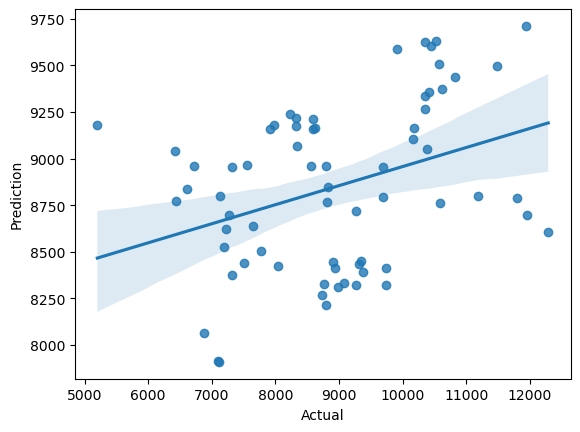

In [23]:
sns.regplot(data=output,x='Actual',y='Prediction')
plt.show()